In [1]:
import matplotlib.pyplot as plt
import numpy as np
import superdirtpy as sd

rng = np.random.default_rng()
client = sd.SuperDirtClient()
p = {"s": "mydevice", "midichan": 0, "amp": 0.7}
bpm = 120
dt = round(60 / bpm / 4, 4)

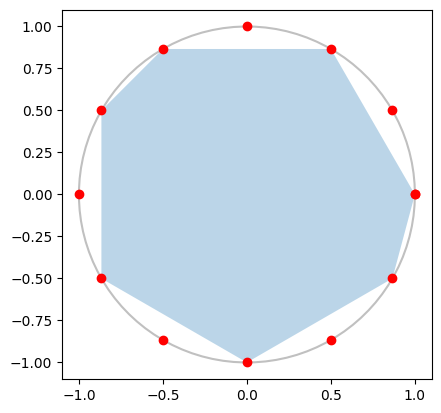

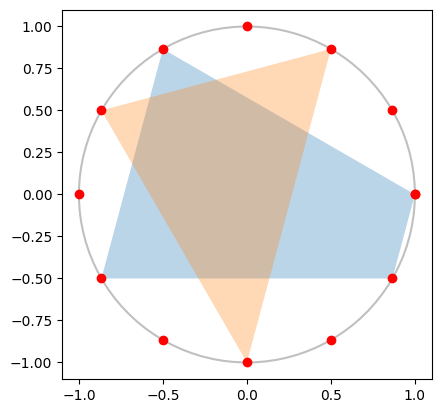

In [2]:
def n_circle(scales: list[int]) -> None:
    fig, ax = plt.subplots()
    ax.set_aspect("equal", "box")

    theta1 = np.linspace(0, 2*np.pi, 100)
    x1 = np.cos(theta1)
    y1 = np.sin(theta1)
    ax.plot(x1, y1, "silver")

    theta2 = np.linspace(0, 2*np.pi, 13)
    x2 = np.cos(theta2)
    y2 = np.sin(theta2)
    ax.plot(x2, y2, "ro")

    for scale in scales:
        x = np.cos(np.array(scale) * np.pi/6)
        y = np.sin(np.array(scale) * np.pi/6)
        ax.fill(x, y, alpha=0.3)

    plt.show()


s1 = sd.Scale(sd.PitchClass.C, sd.Scales.major)
n_circle([x.degrees() for x in [
    s1,
]])

c1 = s1.bind([0, 2, 4, 6])
c2 = s1.bind([-2, 1, 3, 5, 7])
n_circle([
    c1,
    c2,
])

In [ ]:
tctx = sd.TemporalContext()
for _ in range(16):
    params = p | {
        "n": [c1, c2],
        "delta": dt * 16,
    }
    sd.Pattern(client=client, params=params).play(tctx)